<a href="https://colab.research.google.com/github/diegoesteve/shared/blob/master/LAB01_DiegoE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Time series analysis</h1></center>
<center><h2>LAB01: Forecasting Diego Esteve - Pablo Brisuela</h2></center>
<br>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
DATA_FILE = 'datasets/Telefonia_movil.csv'
RAW_REPO = 'https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/'
if IN_COLAB:
    !wget -cO plotting.py {RAW_REPO + 'plotting.py'}
    DATA_FILE = RAW_REPO + DATA_FILE

--2019-10-02 00:24:22--  https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/plotting.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/plotting.py [following]
--2019-10-02 00:24:22--  https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/plotting.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3315 (3.2K) [text/plain]
Saving to: ‘plotting.py’

plotting.py         100%[===================>]   3.24K  --.-KB/s    in 0s      

2019-10-02 00:24:22 (57.1 MB/s) - ‘plotting.py’ saved [3315/3315]



In [0]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [0]:
plt.rcParams['figure.figsize'] = [16, 4]

In [5]:
print(DATA_FILE)

https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/datasets/Telefonia_movil.csv


## Data: Consumo de telefonía celular

Tenemos datos del consumo para líneas de celulares pre-pagos y post-pagos
empezamos cargando los datos y convirtiendo el indice a períodos trimestrales, nos vamos a enfocar en los datos a partir del año 2013

In [6]:
#abrimos el archivo con datos y convertimos los campos "Año" y "Trimetre" a tipo str
#data=pd.read_csv('Telefonia_movil.csv', index_col=None, parse_dates=True, dtype={'Año': str, 'Trimestre':str})
data = pd.read_csv(DATA_FILE, index_col=None, parse_dates=True, dtype={'Año': str, 'Trimestre':str})
data.head()
#data.index=data.index.to_period(freq='Q') # converting the index to quarterly period instead of dates
#data=data['1980':] # filtering the use data from Jan/1980 onwards

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


In [7]:
#armamos los datos trimestrales
data['Quarter'] = data['Año']+"Q"+data['Trimestre']
#asignamos el indice a "Quarter"
data.index = pd.to_datetime(data['Quarter'])
data.index  =data.index.to_period(freq='Q')
data

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Quarter
Quarter,,,,,,,
2013Q1,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013,2013Q1
2013Q2,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013,2013Q2
2013Q3,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013,2013Q3
2013Q4,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013,2013Q4
2014Q1,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013,2014Q1
2014Q2,2014,2,10.821.463,6438071,17259534,Abr-Jun 2014,2014Q2
2014Q3,2014,3,11.524.344,7179152,18703495,Jul-Sept 2014,2014Q3
2014Q4,2014,4,11.997.330,7147630,19144961,Oct-Dic 2014,2014Q4
2015Q1,2015,1,10.273.637,6480172,16753809,Ene-Mar 2015,2015Q1


In [0]:
y=data['Total de minutos salientes (miles)']

## Análisis y exploración de datos 

ploteamos los datos, podemos ver que el consumo es cada vez mayor a medida que pasa el tiempo, con un pico en el 4to trimestre del 2017

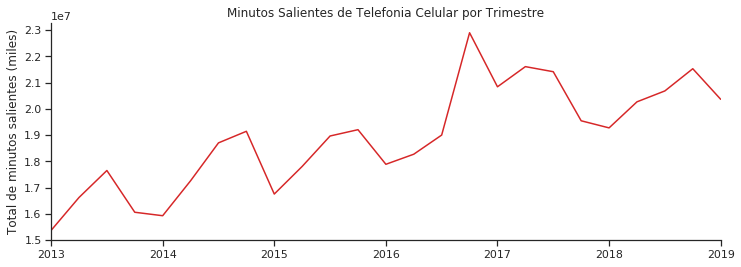

In [9]:
fig, ax= plt.subplots(figsize=(12,4))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Total de minutos salientes (miles)')
ax.set_title('Minutos Salientes de Telefonia Celular por Trimestre')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

In [10]:
y.describe().round(2)

count          25.00
mean     18922204.72
std       1982378.31
min      15368060.00
25%      17650638.00
50%      19001229.00
75%      20364355.00
max      22899656.00
Name: Total de minutos salientes (miles), dtype: float64

## Random walk

Vamos a usar el metodo random walk para generar predicciones

Generamos predicciones para los próximos 4 trimestres. 

In [0]:
#seteamos el "horizonte", periodos a estimar
h = 4
#armamos el set de datos teniendo en cuenta el indice
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')

pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) 
pred

2019Q2    20364355
2019Q3    20364355
2019Q4    20364355
2020Q1    20364355
Freq: Q-DEC, dtype: int64

EStimamos la desviación estándar

In [0]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,2)

1409600.3

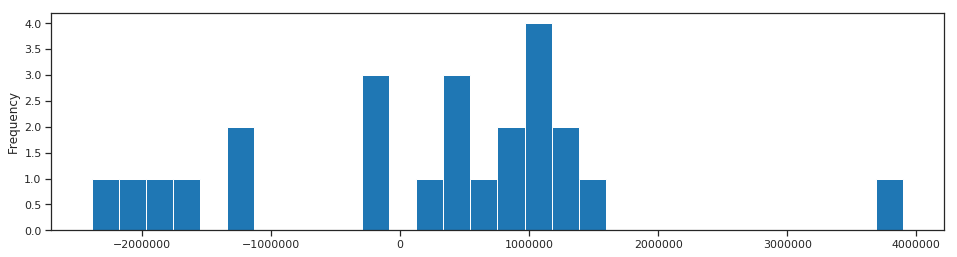

In [0]:
resid.plot.hist(bins=30);

In [0]:
np.arange(1,h+1)

array([1, 2, 3, 4])

In [0]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(2)

,0,1
2019Q2,17601589.19,23127120.81
2019Q3,16457214.12,24271495.88
2019Q4,15579104.25,25149605.75
2020Q1,14838823.38,25889886.62


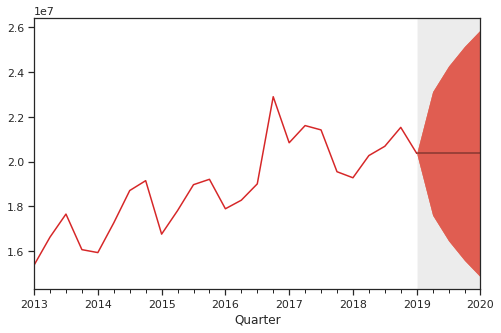

In [0]:
from plotting import fanchart
point_pred = (intv[0]+intv[1])/2
fig, ax = fanchart(y,point_pred,intv,intv,intv)
plt.show()

## Simple exponential smoothing


In [0]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,43441867557448.141
Optimized:,True,AIC,708.589
Trend:,None,BIC,711.027
Seasonal:,None,AICC,710.589
Seasonal Periods:,None,Date:,"Sat, 21 Sep 2019"
Box-Cox:,False,Time:,23:40:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5492677,alpha,True
initial_level,1.5952e+07,l.0,True


Analizamos AIC, BIC y MSE.

In [0]:
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' In-sample fit:')
print(' MSE               {0:.2f}'.format(mse_ses))

 In-sample fit:
 MSE               1737674702297.93


Calculamos AIC y BIC

In [0]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -387.768
 AIC               781.536
 BIC               785.193


Comparamos los datos "suavizados" con los originales

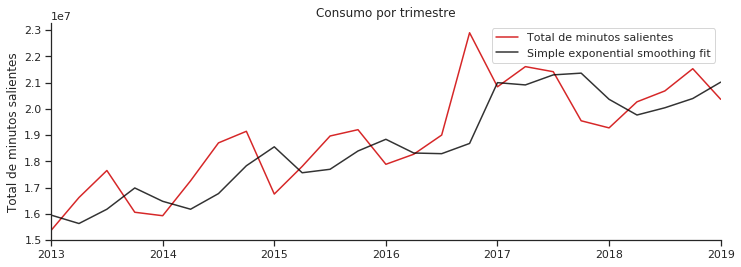

In [0]:
fig, ax= plt.subplots(figsize=(12,4))
y.plot(color=red, label='Total de minutos salientes')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Total de minutos salientes')
ax.set_title('Consumo por trimestre')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

## Model diagnostics

Diagnósticos desiduales para el modelo suavizaso exponencial 

1. Residual plot.
2. Residual autocorrelation function (ACF) plot.
3. Residual distribution plots.

In [0]:
resid=y-fitted_ses 

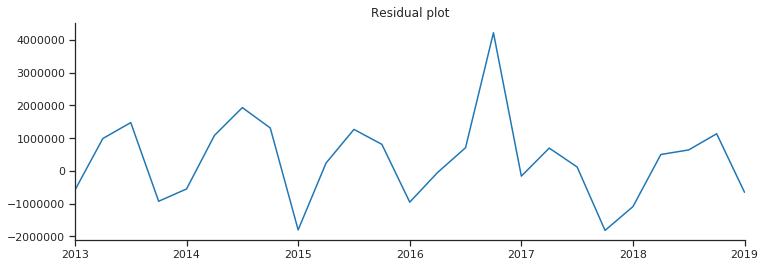

In [0]:
fig, ax= plt.subplots(figsize=(12,4))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

Next is the residual ACF plot aka correlogram

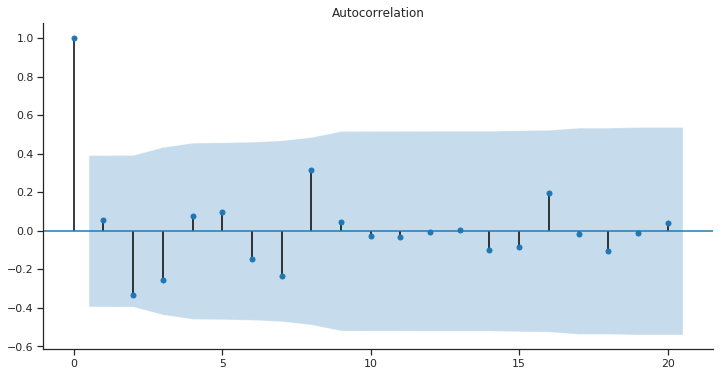

In [0]:
fig, ax = plt.subplots(figsize=(12,6))
sm.graphics.tsa.plot_acf(resid, lags=20, ax=ax)
sns.despine()
plt.show()

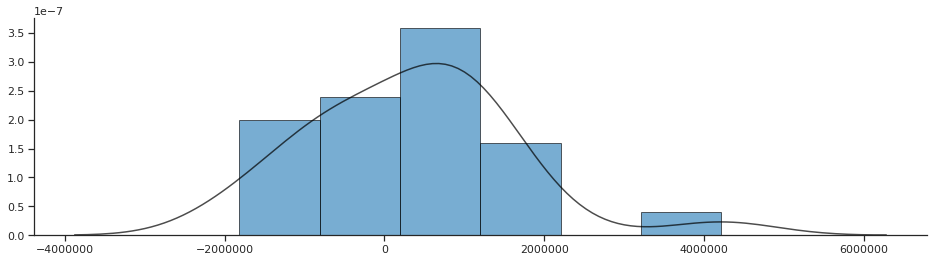

In [0]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))

    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.6, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

## Validación del modelo


In [0]:
(y.index.get_loc('2015Q1')-1)/len(y)

0.28

In [0]:
validation=y['2015Q1':].index 
start = y.index.get_loc('2015Q1') 

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail().round(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,RW,SES,Actual
Quarter,,,
2018Q1,19545262.0,20307923.78,19274565.0
2018Q2,19274565.0,19684128.78,20267591.0
2018Q3,20267591.0,20031446.43,20682782.0
2018Q4,20682782.0,20428033.99,21528745.0
2019Q1,21528745.0,21142430.14,20364355.0


Random Walk parece dar la mejor predicción

In [0]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(2)

,RMSE,SE
RW,1485419.35,370921.62
SES,1555701.81,387086.91


## Predicción 

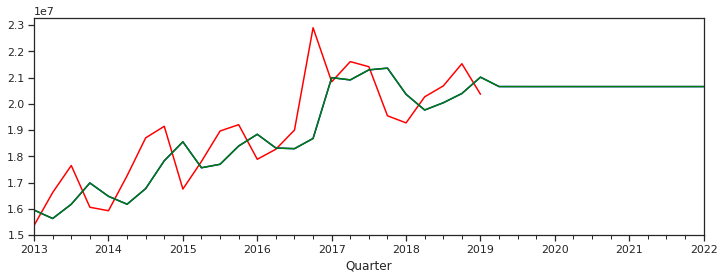

In [0]:
h=12
w=h*10
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red',figsize=(12,4))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');